# Consumer Finance Complaints (Named Entity Recognition)

### Introduction

Businesses always strive to keep customers satisfied. Consumer complaints often lead to a loss of a consumer if those complaints are not dealt properly. 
See [CFPB Link](https://www.consumerfinance.gov/data-research/consumer-complaints/) for more information. Complaints are an unwanted situation for any company. 
These complaints, if genuine, need to be addressed by 'User Experience' department of a company. 
This notebook analyzes complaints against financial institutions within United States. 

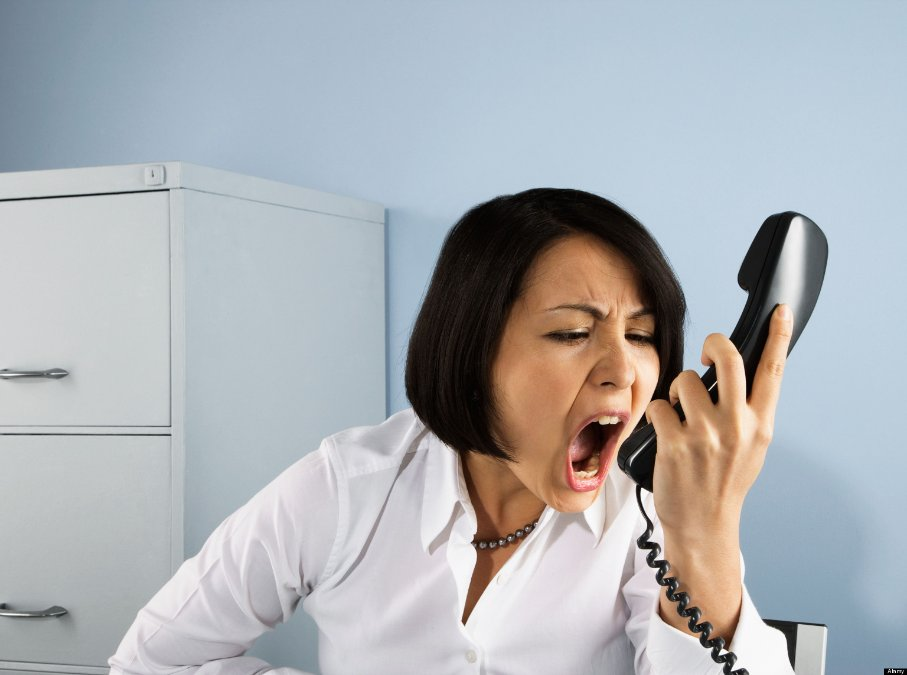

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/kaggle/input/us-consumer-finance-complaints/consumer_complaints.csv', 
                 low_memory=False, index_col='complaint_id')

In [3]:
df.shape

(555957, 17)

In [4]:
df.head()
#https://www.consumerfinance.gov/complaint/data-use/

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
complaint_id,,,,,,,,,,,,,,,,,
511074,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes
511080,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes
510473,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No
510326,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes
511067,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes


In [5]:
for col in df.columns:
    print('{:30} : {:6} : {:}'.format(col, df[col].nunique(), df[col].dtype))

date_received                  :   1608 : object
product                        :     11 : object
sub_product                    :     46 : object
issue                          :     95 : object
sub_issue                      :     68 : object
consumer_complaint_narrative   :  65646 : object
company_public_response        :     10 : object
company                        :   3605 : object
state                          :     62 : object
zipcode                        :  27052 : object
tags                           :      3 : object
consumer_consent_provided      :      4 : object
submitted_via                  :      6 : object
date_sent_to_company           :   1557 : object
company_response_to_consumer   :      8 : object
timely_response                :      2 : object
consumer_disputed?             :      2 : object


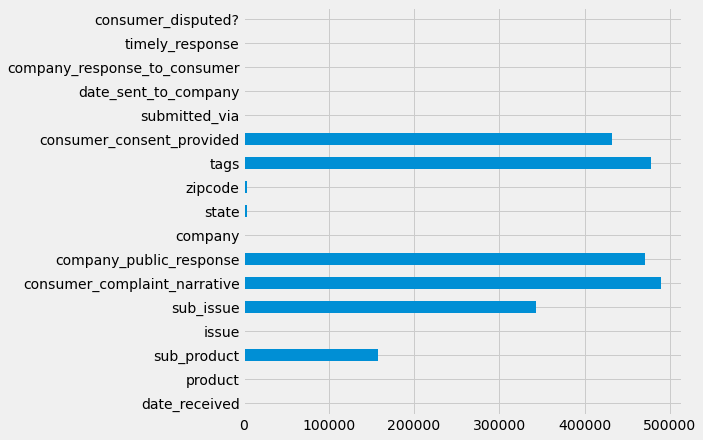

In [6]:
df.isnull().sum().plot(kind='barh', figsize=(7, 7));

In [7]:
df.sample(5).T

complaint_id,1825241,1645724,768214,68130,667546
date_received,03/09/2016,11/09/2015,03/17/2014,05/01/2012,01/14/2014
product,Mortgage,Debt collection,Mortgage,Mortgage,Debt collection
sub_product,Other mortgage,Medical,Conventional fixed mortgage,Conventional adjustable mortgage (ARM),"Other (i.e. phone, health club, etc.)"
issue,"Loan servicing, payments, escrow account",Cont'd attempts collect debt not owed,"Loan servicing, payments, escrow account","Loan servicing, payments, escrow account",Communication tactics
sub_issue,NaN,Debt was paid,NaN,NaN,Frequent or repeated calls
consumer_complaint_narrative,NaN,I had a XXXX in XXXX XXXX and was transported ...,NaN,NaN,NaN
company_public_response,NaN,NaN,NaN,NaN,NaN
company,Ocwen,"APEX Asset Management, LLC",Freedom Mortgage,Capital One,Delbert Services
state,NJ,NY,MO,HI,IN
zipcode,08242,140XX,63124,96753,46410


In [8]:
df['com_year'] = pd.to_datetime(df['date_received']).dt.year

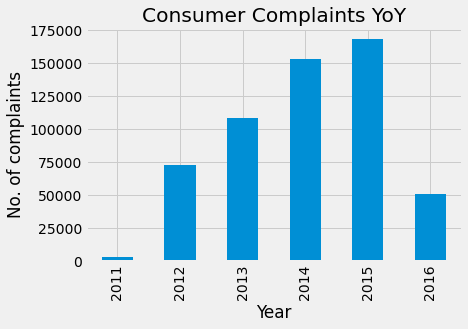

In [9]:
df['com_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of complaints')
plt.title('Consumer Complaints YoY');

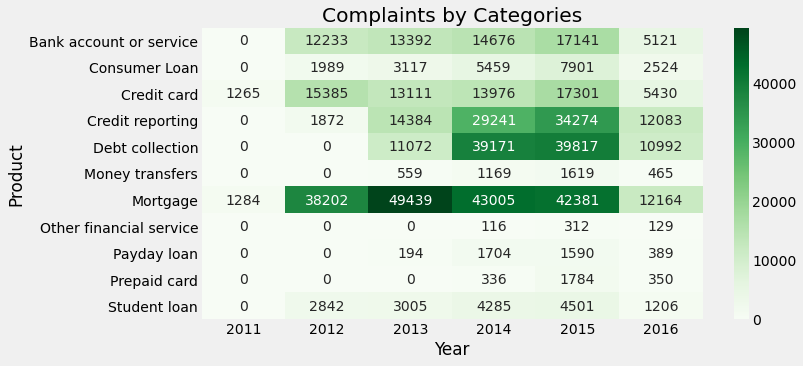

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['product'], df['com_year']), annot=True, fmt='.0f', cmap='Greens')
plt.title('Complaints by Categories')
plt.xlabel('Year')
plt.ylabel('Product');

In [11]:
state_count_acc = pd.value_counts(df['state'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count Complaints",
))

fig.update_layout(
    title_text = 'Consumer Financial Complaints',
    geo_scope='usa',
)

iplot(fig)

In [12]:
round(1e2*df['issue'].value_counts().head(10)/len(df))

Loan modification,collection,foreclosure    17.0
Incorrect information on credit report      12.0
Loan servicing, payments, escrow account    11.0
Cont'd attempts collect debt not owed        8.0
Account opening, closing, or management      5.0
Communication tactics                        3.0
Disclosure verification of debt              3.0
Deposits and withdrawals                     3.0
Application, originator, mortgage broker     2.0
Billing disputes                             2.0
Name: issue, dtype: float64

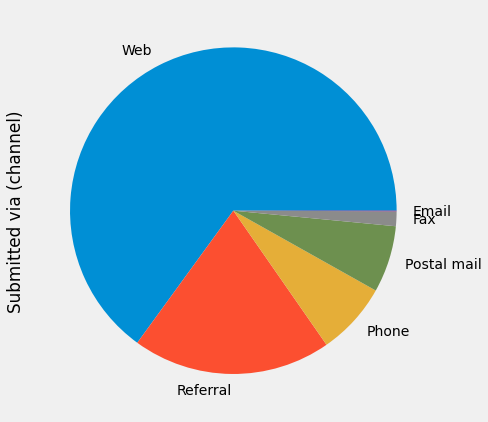

In [24]:
df['submitted_via'].value_counts().plot.pie(figsize=(7, 7))
plt.ylabel('Submitted via (channel)');

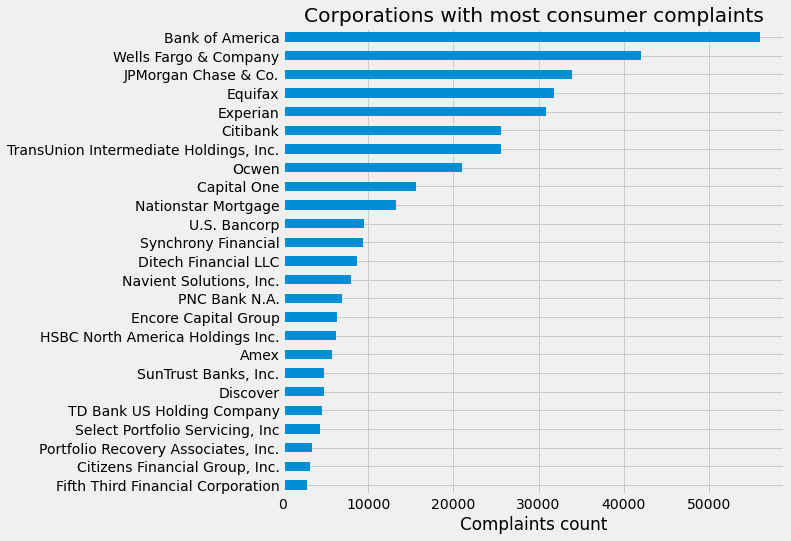

In [14]:
df['company'].value_counts().head(25)[::-1].plot(kind='barh', figsize=(8,8))
plt.xlabel('Complaints count')
plt.title('Corporations with most consumer complaints');

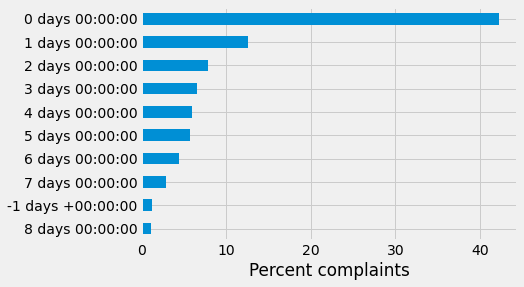

In [15]:
(((pd.to_datetime(df['date_sent_to_company']) - pd.to_datetime(df['date_received']))
 .value_counts()/len(df)*1e2)
 .head(10)[::-1]
 .plot(kind='barh'))
plt.xlabel('Percent complaints');

In [16]:
df[df['consumer_complaint_narrative'].notnull()][['consumer_complaint_narrative', 'consumer_disputed?']]

,consumer_complaint_narrative,consumer_disputed?
complaint_id,,
1290516,XXXX has claimed I owe them {$27.00} for XXXX ...,No
1290492,Due to inconsistencies in the amount owed that...,No
1290524,In XX/XX/XXXX my wages that I earned at my job...,Yes
1290253,I have an open and current mortgage with Chase...,Yes
1292137,XXXX was submitted XX/XX/XXXX. At the time I s...,Yes
...,...,...
1782682,"XXXX XXXX is reporting incorrectly, payments h...",No
1781861,Reflecting incorrect payment status. Have been...,No
1782804,I have been paying {$180.00} a month through d...,No


In [17]:
1e2*df['consumer_disputed?'].value_counts()/len(df)

No     79.830455
Yes    20.169545
Name: consumer_disputed?, dtype: float64

In [31]:
complaints = df[df['consumer_complaint_narrative'].notnull()][['consumer_complaint_narrative', 'consumer_disputed?']]

In [34]:
complaints.columns = ['complaint', 'disputed']

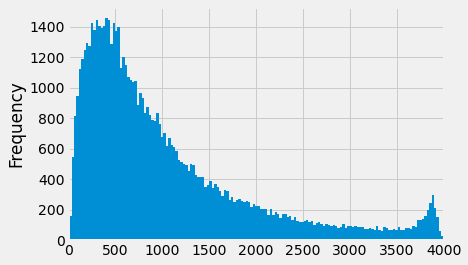

In [44]:
complaints['complaint'].apply(len).plot(kind='hist', bins=200)
plt.xlim(0, 4*10**3);

In [53]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [66]:
complaints['complaint'].iloc[25]

'I have submitted XXXX disputes to Trans Union credit bureau regarding incorrect payment history for an account on my report - XXXX. The payment history reflects multiple late payments when in fact the account was paid in a timely manner. I have also contacted the creditor but no answer has been given after numerous attempts. I am not sure what else to do given the attempts and lack of proper response from the credit bureau. \n'

In [65]:
doc = nlp(complaints['complaint'].iloc[25])
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

XXXX 17 21 ORG
Trans Union 34 45 ORG
